# Phase 1: Raw Pulse Signal Exploration

## Objective
To explore and understand raw PPG pulse signals before preprocessing or modeling.
This step focuses on signal shape, noise, and basic characteristics.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


In [12]:
# Load the dataset
df = pd.read_csv("PPG_Dataset.csv")

# Show basic info
df.head()


,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,Label
0,-0.015552,0.016963,0.013575,0.027204,0.068154,0.129259,0.127915,0.345174,0.197811,0.167651,...,-0.426464,-0.346976,-0.132168,-0.252098,-0.241969,-0.134235,-0.091327,-0.081713,-0.057693,MI
1,0.002323,0.002754,0.022539,0.228807,0.107751,0.034439,0.086007,0.155667,0.163327,0.223759,...,-0.169345,-0.356808,-0.338996,-0.292489,-0.152872,-0.156076,-0.103265,-0.041579,-0.044272,MI
2,0.050481,-0.339781,0.265111,0.045092,0.040086,0.087173,0.092814,0.099586,-0.143305,0.164186,...,-0.401426,-0.402333,-0.373426,-0.303710,0.008599,-0.180633,-0.143135,-0.084758,0.060668,MI
3,0.023882,0.016561,0.248547,0.054567,0.128032,0.085954,0.107359,0.207137,0.174547,-0.100118,...,-0.390700,-0.353882,-0.294014,-0.267005,-0.242258,-0.186946,-0.173718,0.101331,0.063555,MI
4,-0.058591,0.171551,0.057262,0.270869,0.138357,0.078509,0.062504,0.104447,0.134795,0.194248,...,-0.391598,-0.334490,-0.326873,-0.249881,-0.210052,-0.194763,-0.415365,0.015432,0.010321,MI


In [13]:
df.shape


(2576, 2001)

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2576 entries, 0 to 2575
Columns: 2001 entries, 0 to Label
dtypes: float64(2000), object(1)
memory usage: 39.3+ MB


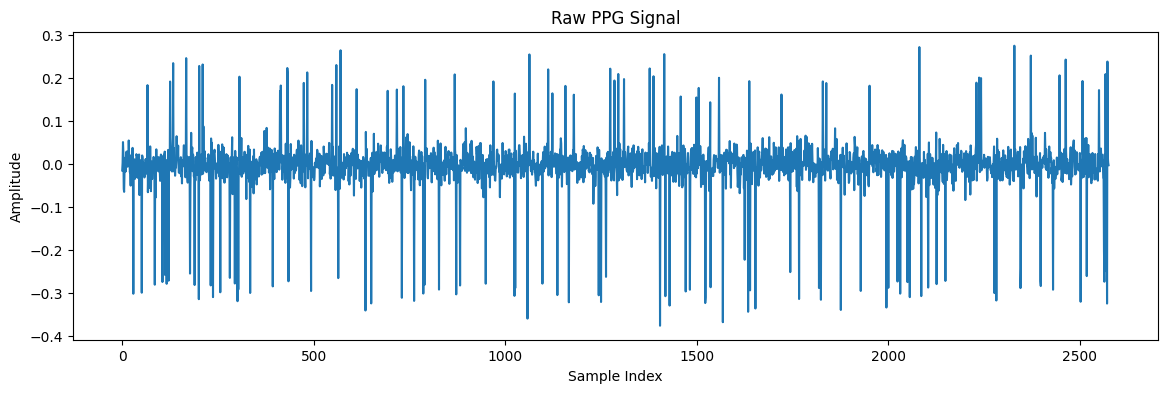

In [15]:
signal = df.iloc[:, 0]

plt.figure(figsize=(14, 4))
plt.plot(signal)
plt.title("Raw PPG Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()


## Observations
- Signal shows repeating pulse-like patterns
- Presence/absence of noise: __________
- Amplitude stability: __________
- Any visible irregularity: __________

In [16]:
# Separate signal and label
signal_columns = df.columns[:-1]   # first 2000 columns
label_column = df.columns[-1]       # last column

signals = df[signal_columns]
labels = df[label_column]

signals.shape, labels.shape


((2576, 2000), (2576,))

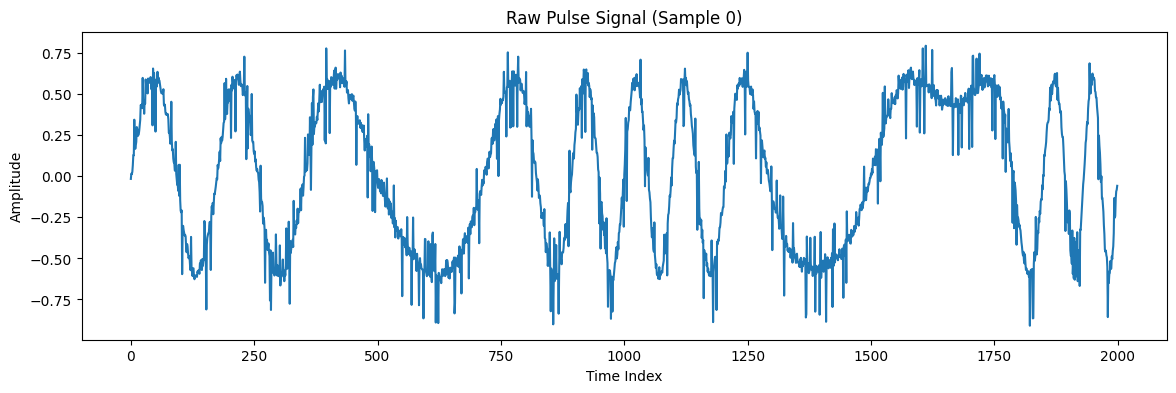

'MI'

In [17]:
# Select one sample
sample_index = 0
pulse_signal = signals.iloc[sample_index].values

plt.figure(figsize=(14, 4))
plt.plot(pulse_signal)
plt.title(f"Raw Pulse Signal (Sample {sample_index})")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.show()

labels.iloc[sample_index]


## Raw Signal Observations (Sample 0)

- The signal shows repeating pulse-like peaks.
- Peak spacing appears: (regular / irregular) irregular
- Amplitude appears: (stable / varying) varying
- Noise level: (low / moderate / high) can't explain

In [18]:
# Inspect unique labels
labels.unique()[:10]


array(['MI', 'Normal'], dtype=object)

In [19]:
labels.value_counts().head()


Label
MI        1294
Normal    1282
Name: count, dtype: int64

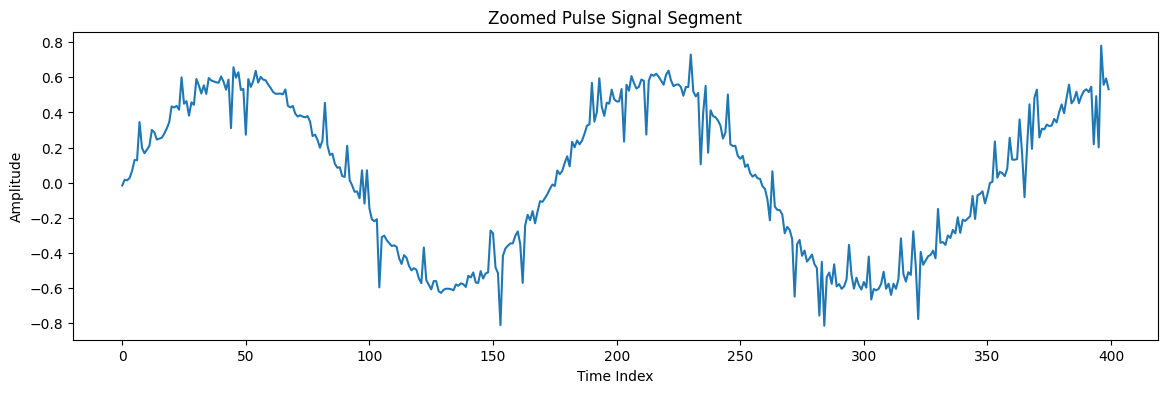

In [20]:
# Zoom into a smaller window
start = 0
end = 400  # first few cycles

plt.figure(figsize=(14, 4))
plt.plot(pulse_signal[start:end])
plt.title("Zoomed Pulse Signal Segment")
plt.xlabel("Time Index")
plt.ylabel("Amplitude")
plt.show()


## Phase 1 Summary Observations

- The pulse signal is a fixed-length time-series (2000 samples).
- Clear systolic peaks are not sharply visible, indicating noise or smoothing.
- Periodic oscillations (~12 cycles) suggest underlying cardiac rhythm.
- Signal quality varies, reinforcing the need for preprocessing.